## Importing Libraries

In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset

voice = pd.read_csv("C:/Users/Nil/Documents/GUVI PROJECT/Human Voice Clustering ML/data/vocal_gender_features_new.csv")
voice.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [3]:
# Basic information

voice.shape

(16148, 44)

In [4]:
# Statistical Information

voice.describe()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,1709.269730,1027.564673,1584.195931,432.492328,20.395652,0.023086,3281.808257,0.118088,0.084759,1461.624198,...,13.537739,-0.533815,12.515116,-8.933890,10.982858,0.880024,9.721608,-6.711788,9.536517,0.642804
std,315.558063,286.303662,126.360465,78.723202,1.628596,0.010027,526.824341,0.037707,0.022814,287.763342,...,2.438230,5.593673,2.354020,5.315098,1.886158,4.314862,1.794407,4.069641,1.574890,0.479188
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1475.078509,829.195585,1503.301521,379.552391,19.775875,0.015567,2911.427574,0.089729,0.067508,1279.141250,...,11.861280,-4.521667,10.753869,-12.666048,9.641137,-2.050272,8.455685,-9.676477,8.432545,0.000000
50%,1703.038854,1048.531356,1583.959951,423.121818,20.759579,0.021737,3293.459741,0.116623,0.083121,1484.461250,...,13.306489,-0.625990,12.279825,-8.732289,10.796652,0.949182,9.595896,-6.598702,9.433592,1.000000
75%,1921.202685,1233.451527,1665.806788,477.631817,21.516436,0.029175,3637.773811,0.144095,0.100465,1662.883350,...,15.044193,3.136063,14.099204,-5.328175,12.153640,3.896141,10.863349,-3.575793,10.508087,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


In [5]:
#Check for duplicate rows

voice.duplicated().sum()

1078

In [6]:
#Remove the duplicated rows

voice = voice.drop_duplicates()

In [7]:
#Check for null values

voice.isnull().sum().any()

False

In [8]:
#Check Class Imbalance

voice['label'].value_counts(normalize=True)

label
1    0.653019
0    0.346981
Name: proportion, dtype: float64

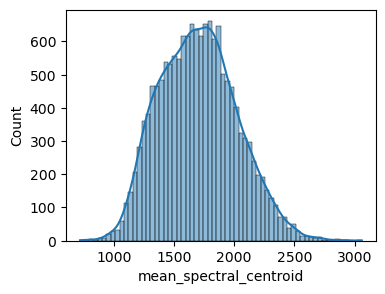

Skew score for mean_spectral_centroid is 0.23692503313460478


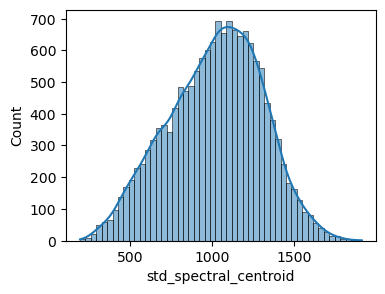

Skew score for std_spectral_centroid is -0.18878321913273133


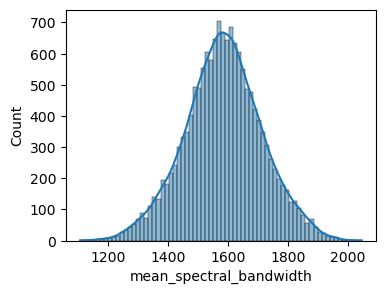

Skew score for mean_spectral_bandwidth is -0.030766098263953198


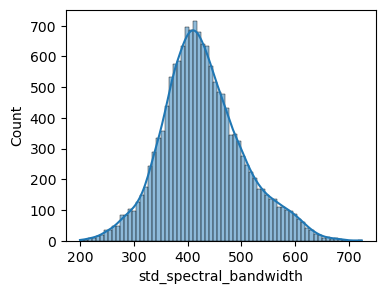

Skew score for std_spectral_bandwidth is 0.3778382162240038


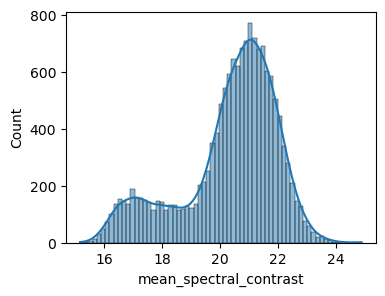

Skew score for mean_spectral_contrast is -0.8996113116946913


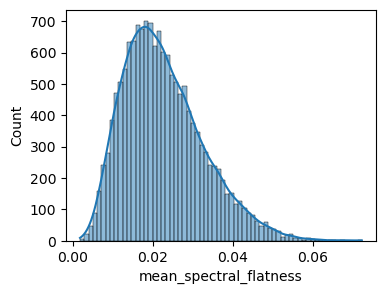

Skew score for mean_spectral_flatness is 0.7213063100723928


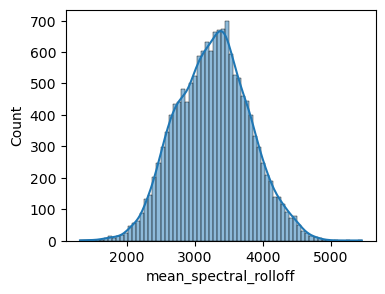

Skew score for mean_spectral_rolloff is 0.04119069092436709


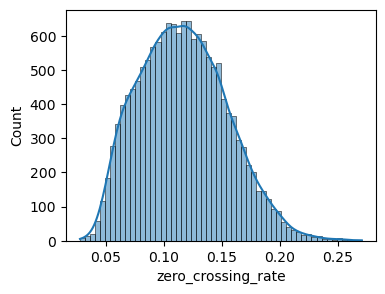

Skew score for zero_crossing_rate is 0.32773548318107765


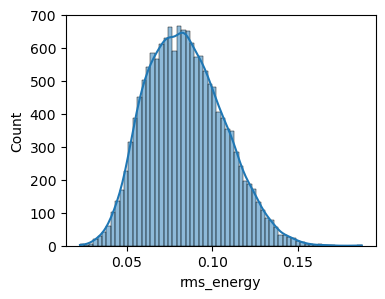

Skew score for rms_energy is 0.3287723934829718


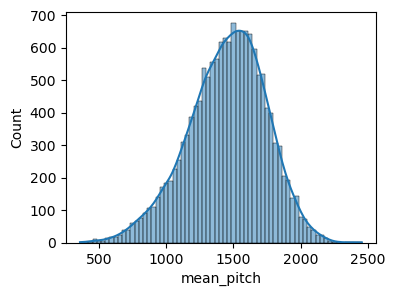

Skew score for mean_pitch is -0.333235037203038


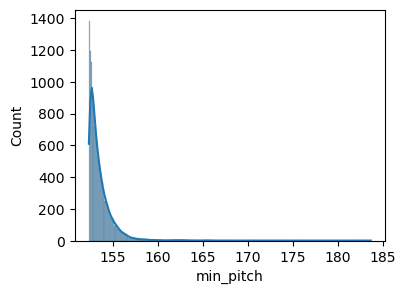

Skew score for min_pitch is 4.878715304398551


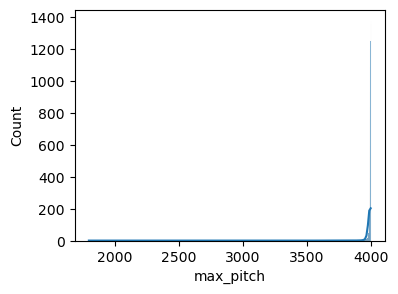

Skew score for max_pitch is -13.400446353709828


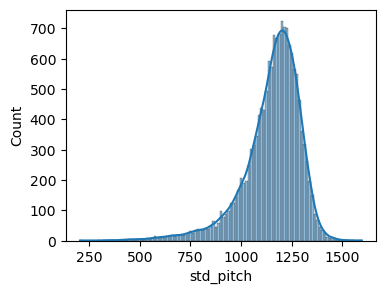

Skew score for std_pitch is -1.4341195168524714


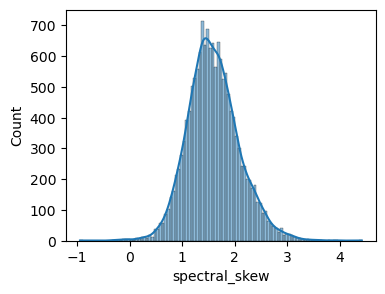

Skew score for spectral_skew is 0.3141051684194021


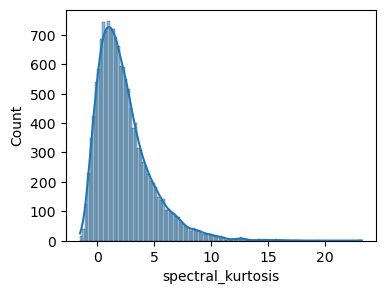

Skew score for spectral_kurtosis is 1.4780299949041742


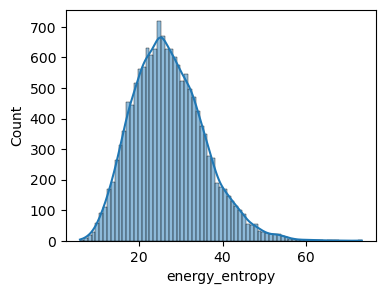

Skew score for energy_entropy is 0.5185059946532827


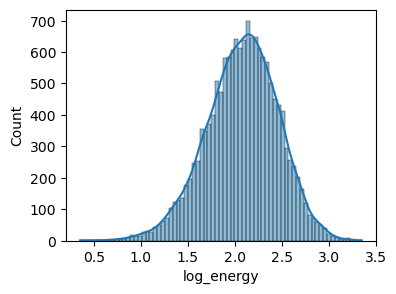

Skew score for log_energy is -0.2715530107671106


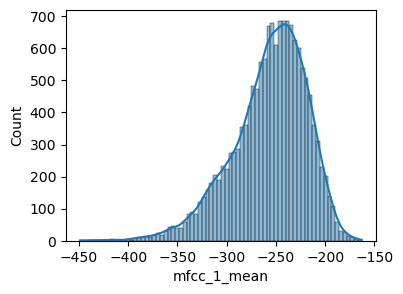

Skew score for mfcc_1_mean is -0.7382434160158493


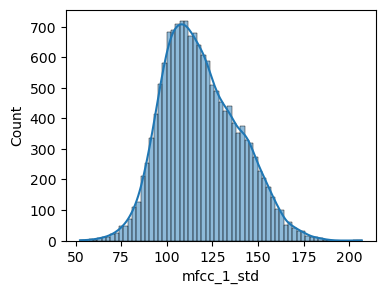

Skew score for mfcc_1_std is 0.36418857409654737


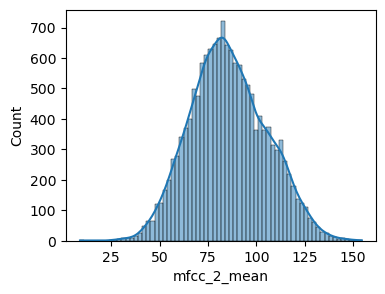

Skew score for mfcc_2_mean is 0.16764008789730786


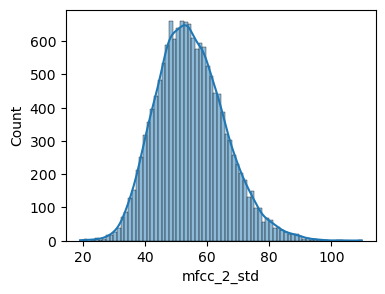

Skew score for mfcc_2_std is 0.3933127131505579


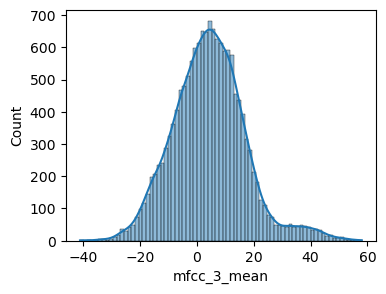

Skew score for mfcc_3_mean is 0.40611615673791734


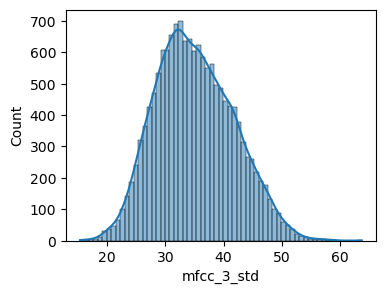

Skew score for mfcc_3_std is 0.2647413759457727


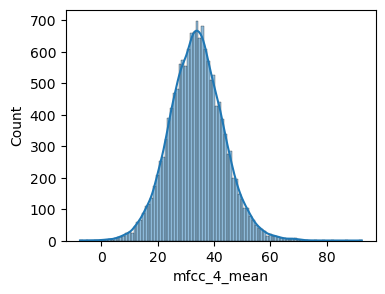

Skew score for mfcc_4_mean is 0.158853636501895


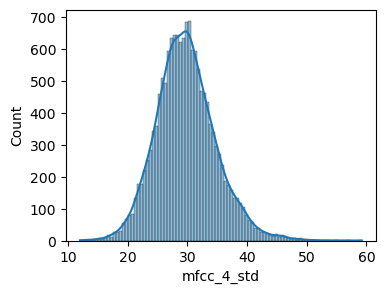

Skew score for mfcc_4_std is 0.4189145915170056


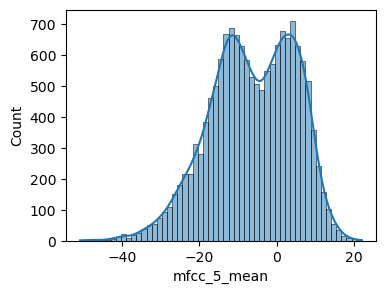

Skew score for mfcc_5_mean is -0.35504976179543957


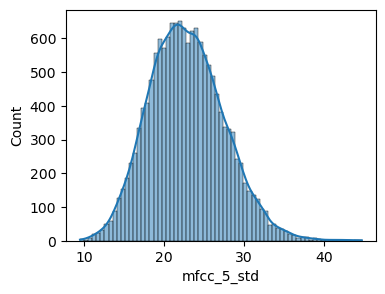

Skew score for mfcc_5_std is 0.3224748088351393


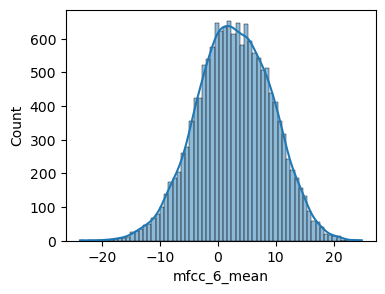

Skew score for mfcc_6_mean is -0.08717135840022211


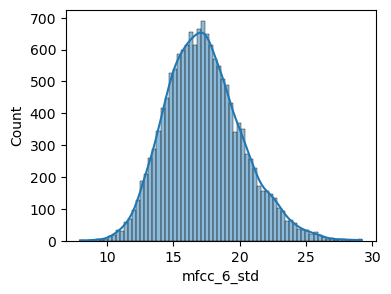

Skew score for mfcc_6_std is 0.4112461536725947


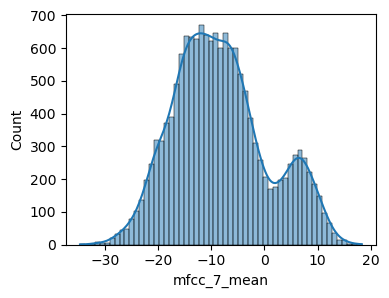

Skew score for mfcc_7_mean is 0.3632016470377358


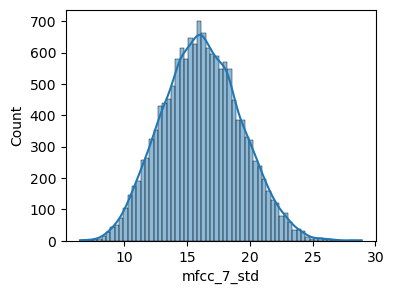

Skew score for mfcc_7_std is 0.1274064473044206


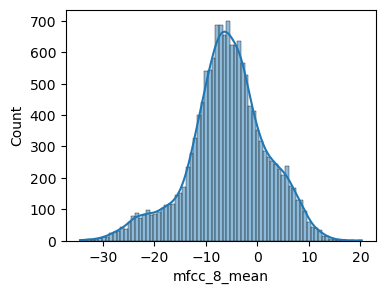

Skew score for mfcc_8_mean is -0.32576829651934547


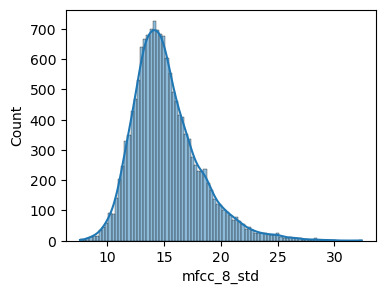

Skew score for mfcc_8_std is 0.989086678582602


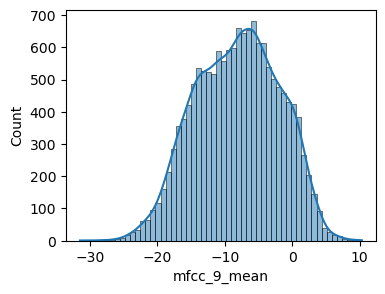

Skew score for mfcc_9_mean is -0.10968046784775902


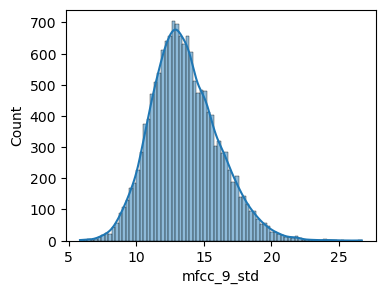

Skew score for mfcc_9_std is 0.4345911383141654


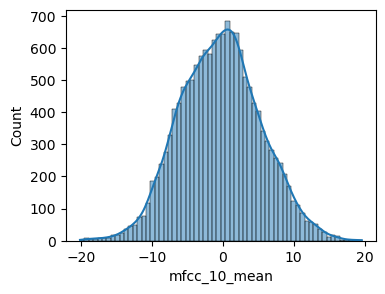

Skew score for mfcc_10_mean is 0.0612233683966394


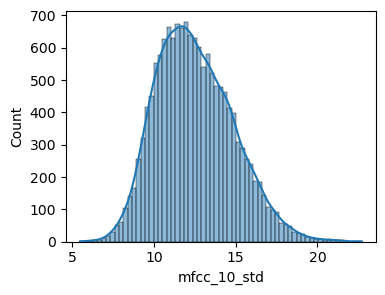

Skew score for mfcc_10_std is 0.4258298781116466


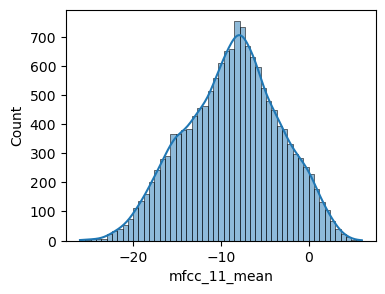

Skew score for mfcc_11_mean is -0.12518513158532593


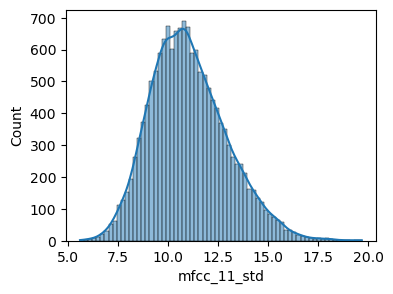

Skew score for mfcc_11_std is 0.48264870343132865


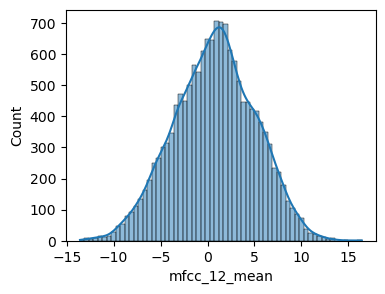

Skew score for mfcc_12_mean is -0.08675091178012996


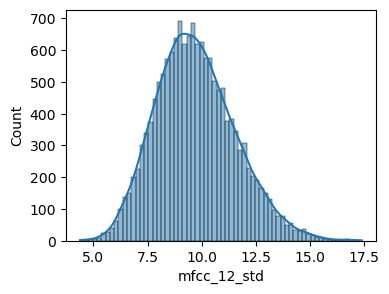

Skew score for mfcc_12_std is 0.37243800436318186


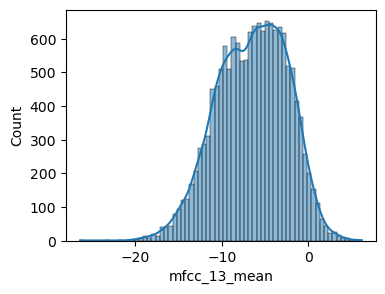

Skew score for mfcc_13_mean is -0.23919263333579727


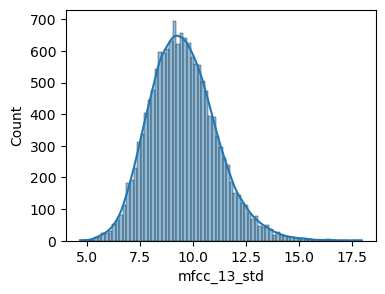

Skew score for mfcc_13_std is 0.46824612864607296


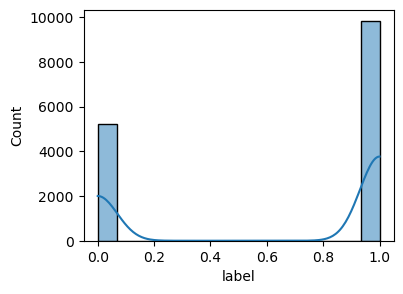

Skew score for label is -0.6429890734635194


In [9]:
#Distribution plots for each feature

for column in voice.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(x=voice[column], data= voice, kde= True)
    plt.show()
    print(f"Skew score for {column} is {voice[column].skew()}")

In [10]:
#Separating Input and Output features

X = voice.drop('label',axis=1)
y = voice['label']

In [11]:
#Standard Scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=42)

## Classification Models :

## Random Forest

In [13]:
rf = RandomForestClassifier()

In [14]:
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("Accracy Score(Training) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Testing) :", accuracy_score(y_test,y_test_pred))
print("Classification Report :\n", classification_report(y_test,y_test_pred))

Accracy Score(Training) : 1.0
Accracy Score(Testing) : 0.9940278699402787
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1079
           1       0.99      1.00      1.00      1935

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



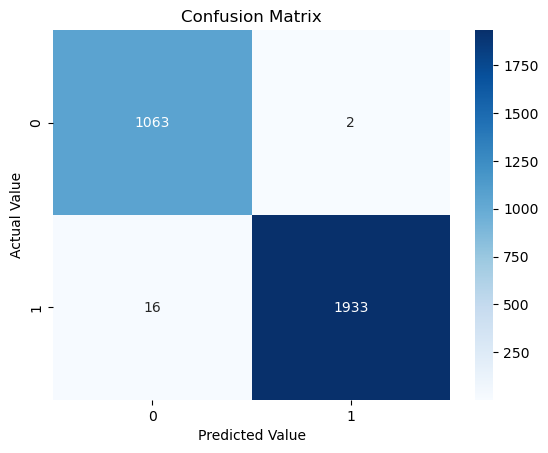

In [15]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test_pred,y_test), annot= True, fmt= 'd', cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

## Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

In [17]:
gb.fit(X_train,y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

print("Accracy Score(Training) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Testing) :", accuracy_score(y_test,y_test_pred))
print("Classification Report :\n", classification_report(y_test,y_test_pred))

Accracy Score(Training) : 0.9985899137358991
Accracy Score(Testing) : 0.9913735899137359
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1079
           1       0.99      1.00      0.99      1935

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



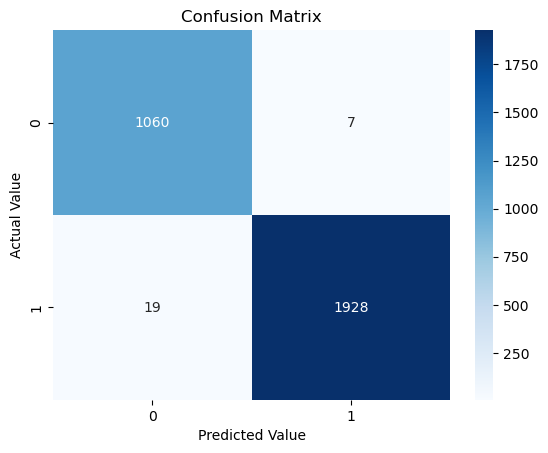

In [18]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test_pred,y_test), annot= True, fmt= 'd', cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

## SVC

In [19]:
svc = SVC(probability=True)

In [20]:
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

print("Accracy Score(Training) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Testing) :", accuracy_score(y_test,y_test_pred))
print("Classification Report :\n", classification_report(y_test,y_test_pred))

Accracy Score(Training) : 1.0
Accracy Score(Testing) : 0.9993364299933643
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



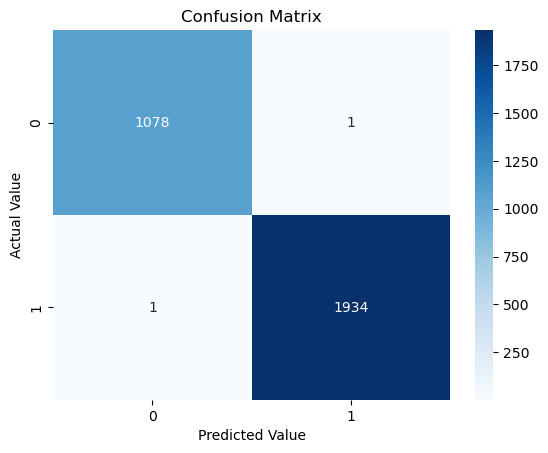

In [21]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test_pred,y_test), annot= True, fmt= 'd', cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

## Cross Validation

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_scale = scaler.fit_transform(X)
models = [rf,gb,svc]

for model in models:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_scale, y, cv=cv, scoring='f1')

    print(f"{model}:")
    print(f"F1 Score for each fold = {scores}")
    print(f"Average F1 Score = {scores.mean()}\n")

RandomForestClassifier():
F1 Score for each fold = [0.99493414 0.99670302 0.99721025 0.99493158 0.99796748]
Average F1 Score = 0.9963492927674122
GradientBoostingClassifier():
F1 Score for each fold = [0.99239351 0.99366608 0.99543842 0.99392405 0.99694967]
Average F1 Score = 0.9944743446920828
SVC(probability=True):
F1 Score for each fold = [1.         0.99949213 0.99923761 0.999238   0.99873064]
Average F1 Score = 0.9993396759872892


## Precision Recall Curve

RandomForestClassifier() PR AUC Score : 0.9999253231714983


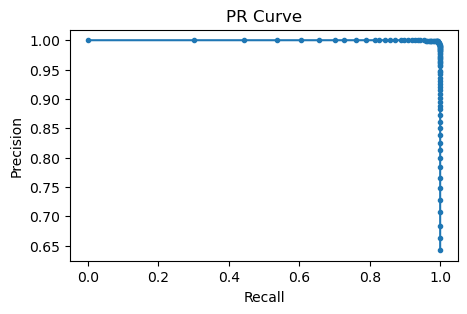

GradientBoostingClassifier() PR AUC Score : 0.9998206579809816


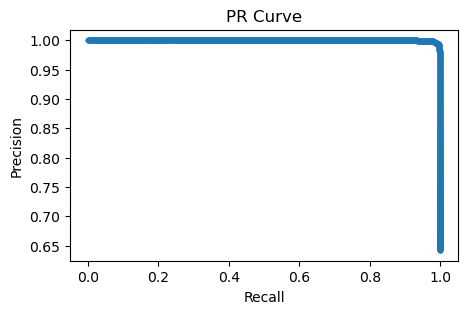

SVC(probability=True) PR AUC Score : 0.99999973299101


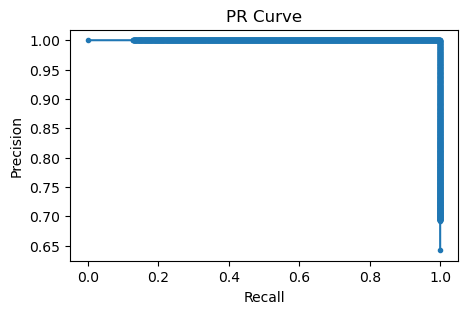

In [24]:
from sklearn.metrics import precision_recall_curve, auc

models = [rf,gb,svc]

#Plotting the PR Curve

for model in models:
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, thresold = precision_recall_curve(y_test, y_scores)

    print(f"{model} PR AUC Score : {auc(recall, precision)}")
    plt.figure(figsize=(5,3))
    plt.plot(recall, precision, marker ='.')
    plt.title("PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

## Clustering :

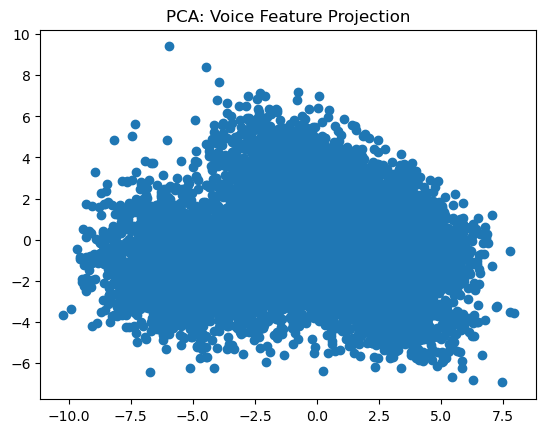

In [25]:
from sklearn.decomposition import PCA

X = voice.drop('label',axis=1)
X_scale = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA: Voice Feature Projection')
plt.show()


##  KMeans

  File "C:\Users\Nil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Nil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Nil\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


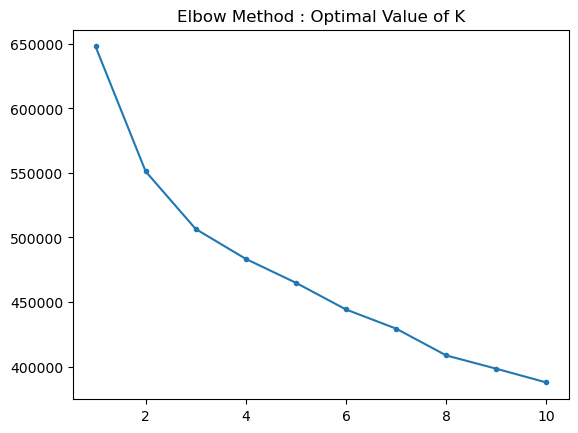

In [26]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scale)
    inertia.append(kmeans.inertia_)

#Elbow Plot

plt.plot(range(1,11), inertia, marker ='.')
plt.title("Elbow Method : Optimal Value of K")
plt.show()

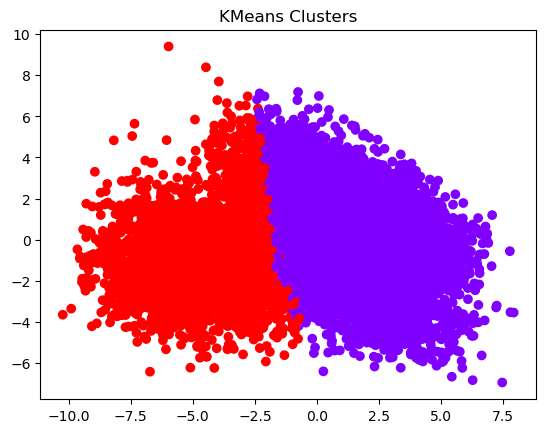

In [27]:
#At k=3, we see the elbow

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scale)

# visualize in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('KMeans Clusters')
plt.show()

In [28]:
set(kmeans_labels)

{0, 1}

In [29]:
print("Silhouette Score:", silhouette_score(X_scale, kmeans_labels))

Silhouette Score: 0.1745264670426607


## DBSCAN

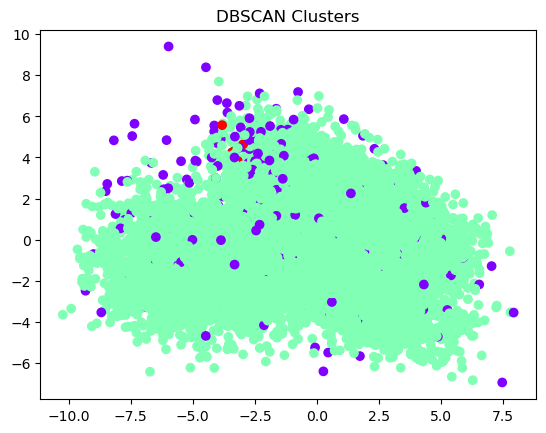

In [30]:
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scale)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clusters')
plt.show()

In [31]:
set(dbscan_labels)

{-1, 0, 1}

In [32]:
print("Silhouette Score:", silhouette_score(X_scale, dbscan_labels))

Silhouette Score: 0.23454360358918047


## Feature Selection by RandomForest

In [33]:
importance = rf.feature_importances_
column = X.columns

In [34]:
features = pd.DataFrame({'Columns' : column, 'Scores' : importance})
select_features = features.sort_values(by = 'Scores',ascending=False).head(15)
Inputs = select_features['Columns'].tolist()

In [35]:
X = voice[Inputs]

X_scale = scaler.fit_transform(X)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=42)

In [37]:
svc = SVC()

In [38]:
svc.fit(X_train,y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

print("Accracy Score(Training) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Testing) :", accuracy_score(y_test,y_test_pred))
print("Classification Report :\n", classification_report(y_test,y_test_pred))

Accracy Score(Training) : 0.9991705374917054
Accracy Score(Testing) : 0.9983410749834107
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



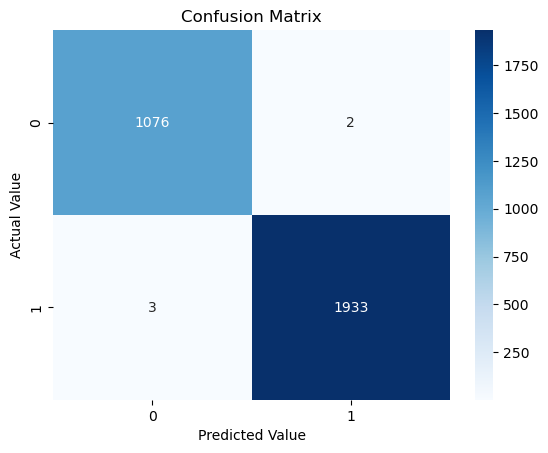

In [39]:
#Confusion Matrix

sns.heatmap(confusion_matrix(y_test_pred,y_test), annot= True, fmt= 'd', cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

In [40]:
#Cross-Validation

X_scale = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc, X_scale, y, cv=cv, scoring='f1')

print("F1-score per fold:", scores)
print("Average F1-score:", scores.mean())

F1-score per fold: [0.99898322 0.99771283 0.99872935 0.99847561 0.99898374]
Average F1-score: 0.998576951658124


## Hyper Parameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01,1]
        }

In [43]:
grid = GridSearchCV(estimator=svc, param_grid=param, cv= 5, scoring='f1',n_jobs=-1,verbose=2)

In [45]:
grid.fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.998608554435813


## Final model for deploy

In [46]:
svc = SVC(C=10, gamma='scale', kernel='rbf')

svc.fit(X_train,y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

print("Accracy Score(Training) :", accuracy_score(y_train,y_train_pred))
print("Accracy Score(Testing) :", accuracy_score(y_test,y_test_pred))
print("Classification Report :\n", classification_report(y_test,y_test_pred))

Accracy Score(Training) : 0.9998341074983411
Accracy Score(Testing) : 0.9990046449900465
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [47]:
from sklearn.metrics import f1_score

print(f1_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

0.9992250064582795
[[1077    2]
 [   1 1934]]


## Save the model

In [48]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(svc, "svc_model.pkl")

['svc_model.pkl']